In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tqdm
from vtk.util import numpy_support
import vtk

In [2]:
def coord_func(x,L,h,N):
    r = np.random.random(N)
    return x + 2*(r-0.5)/L**h

def fractal_point_gen(L,H,N):
    x = [0.5]
    for h in range(1,H+1):
        x = [x_ii for x_i in x for x_ii in coord_func(x_i,L,h,N)]
    return x

def fractal_field_gen(L,H,N,E,N_pix=None,seed=None):
    if seed != None:
        np.random.seed(int(seed))  
    if N_pix==None:
        N_pix = L**H
    fractal_points = [fractal_point_gen(L,H,N) for e in range(E)]
    fractal_field = np.histogramdd(fractal_points, bins=int(N_pix))[0]
    return fractal_field

In [3]:
L_LIST=np.linspace(1,3,20)
N=5
H_LIST=[8]
E=2
N_pix=128
seed = 1000

In [4]:
fields = [((H,L,N),fractal_field_gen(L,H,N,E,N_pix,seed)) for H in H_LIST for L in L_LIST]
fields

[((8, 1.0, 5), array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]])),
 ((8, 1.1052631578947367, 5), array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]])),
 ((8, 1.2105263157894737, 5), array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]])),
 ((8, 1.3157894736842106, 5), array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...

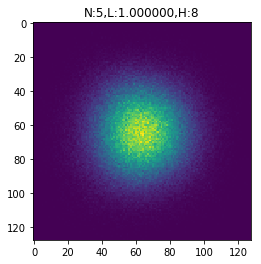

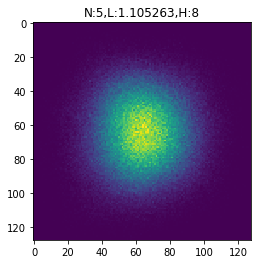

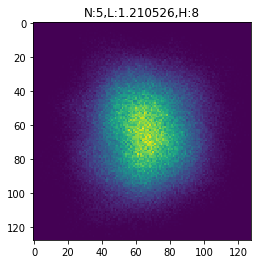

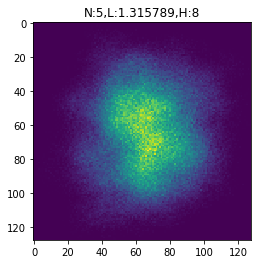

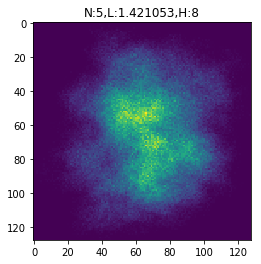

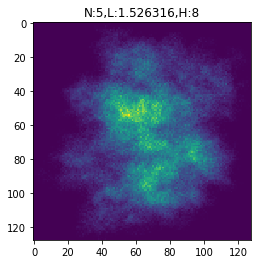

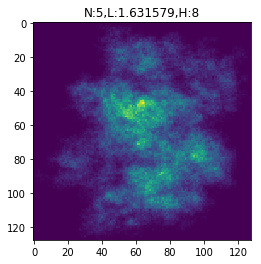

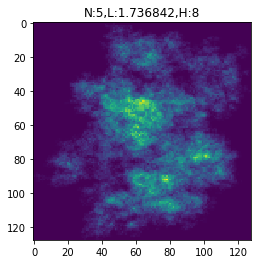

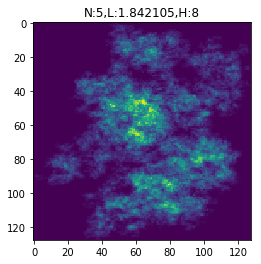

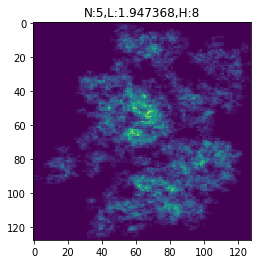

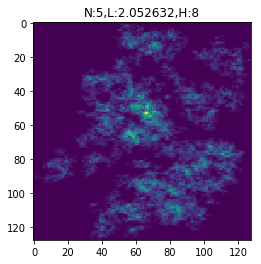

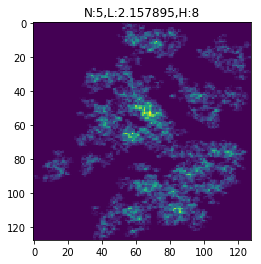

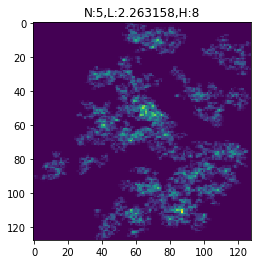

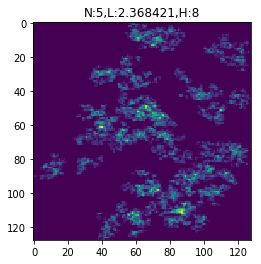

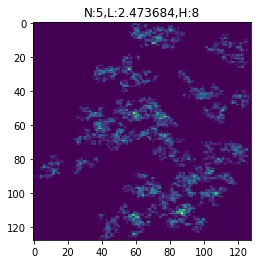

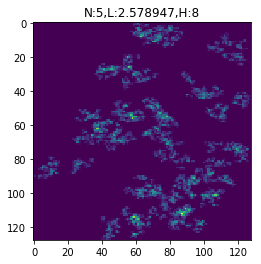

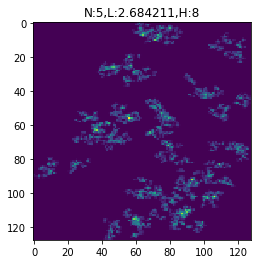

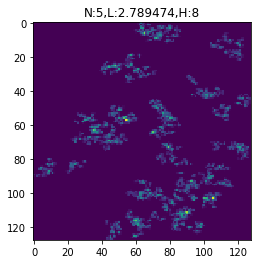

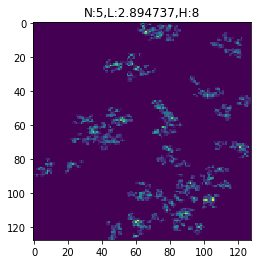

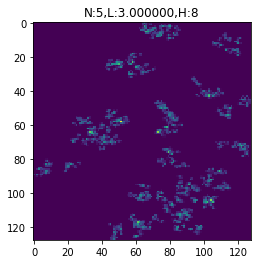

In [5]:
for field in fields:
    plt.figure()
    plt.imshow(field[1])
    plt.title('N:{},L:{:2f},H:{}'.format(field[0][2],field[0][1],field[0][0]))
    plt.show()